In [78]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [79]:
classifier = Sequential()

In [80]:
classifier.add(Convolution2D(32, (3, 3), input_shape = (256,256,3), activation = 'relu'))

In [81]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [82]:
#second convo layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

In [83]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [84]:
#3 convo layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

In [85]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [86]:
classifier.add(Flatten())

In [87]:
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [88]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
from keras.preprocessing.image import ImageDataGenerator

In [90]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [91]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [92]:
training_set = train_datagen.flow_from_directory('../dataset/training_set/',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 16 images belonging to 2 classes.


In [93]:
test_set = test_datagen.flow_from_directory('../dataset/test_set/',
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='binary')


Found 4 images belonging to 2 classes.


In [94]:
classifier.fit_generator(training_set,
                        steps_per_epoch=8,
                        epochs=75,
                        validation_data=test_set,
                        validation_steps=2)

Epoch 1/75
8/8 [==============================] - 5s 603ms/step - loss: 1.3301 - acc: 0.5000 - val_loss: 0.7065 - val_acc: 0.5000
Epoch 2/75
8/8 [==============================] - 4s 443ms/step - loss: 0.6808 - acc: 0.5469 - val_loss: 0.7407 - val_acc: 0.5000
Epoch 3/75
8/8 [==============================] - 4s 444ms/step - loss: 0.6048 - acc: 0.7344 - val_loss: 1.1445 - val_acc: 0.5000
Epoch 4/75
8/8 [==============================] - 4s 454ms/step - loss: 0.4384 - acc: 0.8281 - val_loss: 2.2924 - val_acc: 0.5000
Epoch 5/75
8/8 [==============================] - 4s 456ms/step - loss: 0.3488 - acc: 0.8203 - val_loss: 2.7604 - val_acc: 0.5000
Epoch 6/75
8/8 [==============================] - 4s 450ms/step - loss: 0.1837 - acc: 0.9219 - val_loss: 4.3565 - val_acc: 0.5000
Epoch 7/75
8/8 [==============================] - 4s 453ms/step - loss: 0.1376 - acc: 0.9453 - val_loss: 6.2735 - val_acc: 0.5000
Epoch 8/75
8/8 [==============================] - 3s 433ms/step - loss: 0.1514 - acc: 0.94

8/8 [==============================] - 4s 453ms/step - loss: 4.3829e-04 - acc: 1.0000 - val_loss: 8.0452 - val_acc: 0.5000
Epoch 64/75
8/8 [==============================] - 4s 445ms/step - loss: 1.5711e-06 - acc: 1.0000 - val_loss: 7.7999 - val_acc: 0.5000
Epoch 65/75
8/8 [==============================] - 4s 438ms/step - loss: 5.4946e-05 - acc: 1.0000 - val_loss: 7.7373 - val_acc: 0.5000
Epoch 66/75
8/8 [==============================] - 3s 436ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 67/75
8/8 [==============================] - 4s 440ms/step - loss: 1.1877e-05 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 68/75
8/8 [==============================] - 4s 452ms/step - loss: 2.8567e-05 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 69/75
8/8 [==============================] - 3s 433ms/step - loss: 6.7235e-05 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 70/75
8/8 [==============================] - 4s 444ms/step - loss

In [95]:
classifier.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000001C2EDD59518>>

In [96]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 57600)             0         
__________

In [97]:
import numpy as np

In [135]:
from keras.preprocessing import image

In [154]:
test_image = image.load_img(path='../dataset/single_prediction/correct_or_wrong_2.jpg', target_size=(256, 256))

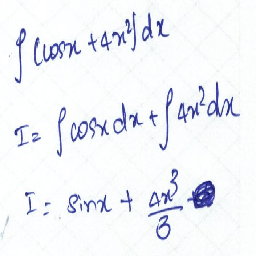

In [155]:
test_image

In [156]:
test_image = image.img_to_array(test_image)

In [157]:
test_image

array([[[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [253., 255., 254.],
        [254., 255., 255.],
        [252., 254., 253.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [252., 254., 253.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [252., 254., 253.],
        [252., 254., 253.],
        [253., 255., 254.]],

       ...,

       [[253., 255., 254.],
        [253., 255., 254.],
        [253., 255., 254.],
        ...,
        [251., 253., 252.],
        [252., 254., 253.],
        [252., 254., 253.]],

       [[252., 254., 253.],
        [251., 253., 252.],
        [254., 255., 255.],
        ...,
        [252., 254., 253.],
        [253., 255., 254.],
        [254., 255., 255.]],

       [[252., 254., 253.],
        [253., 255., 254.],
        [253., 2

In [158]:
test_image = np.expand_dims(a=test_image,axis=0)

In [159]:
test_image.size

196608

In [160]:
result = classifier.predict(test_image)

In [161]:
result

array([[1.]], dtype=float32)

In [153]:
training_set.class_indices

{'correct': 0, 'wrong': 1}

In [179]:
def corrorwor(res):
    if res[0][0]==1:
        pred = "Wrong! Try again"
    else:
        pred = "Correct! Great JOB!"
    return pred
    



In [180]:
corrorwor(result)

'Wrong! Try again'